# HR Analytics Project- Understanding the Attrition in HR

In [1]:
#Importing Libraries

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:/Users/user/Desktop/DT Python/IBM_HR_Attrition_Rate_Analytics-master/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.iterrows

<bound method DataFrame.iterrows of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educa

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

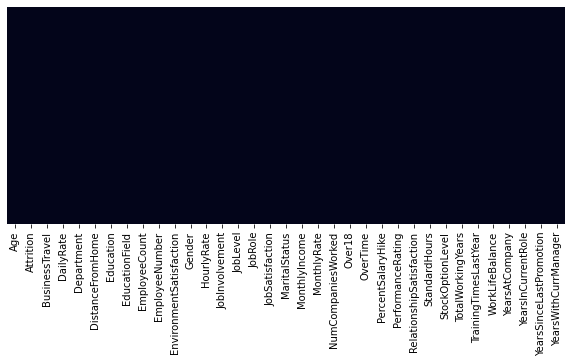

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
data_y=df.loc[df['Attrition'] == 'Yes']
data_y.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [13]:
data_n=df.loc[df['Attrition'] == 'No']
data_n.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [14]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


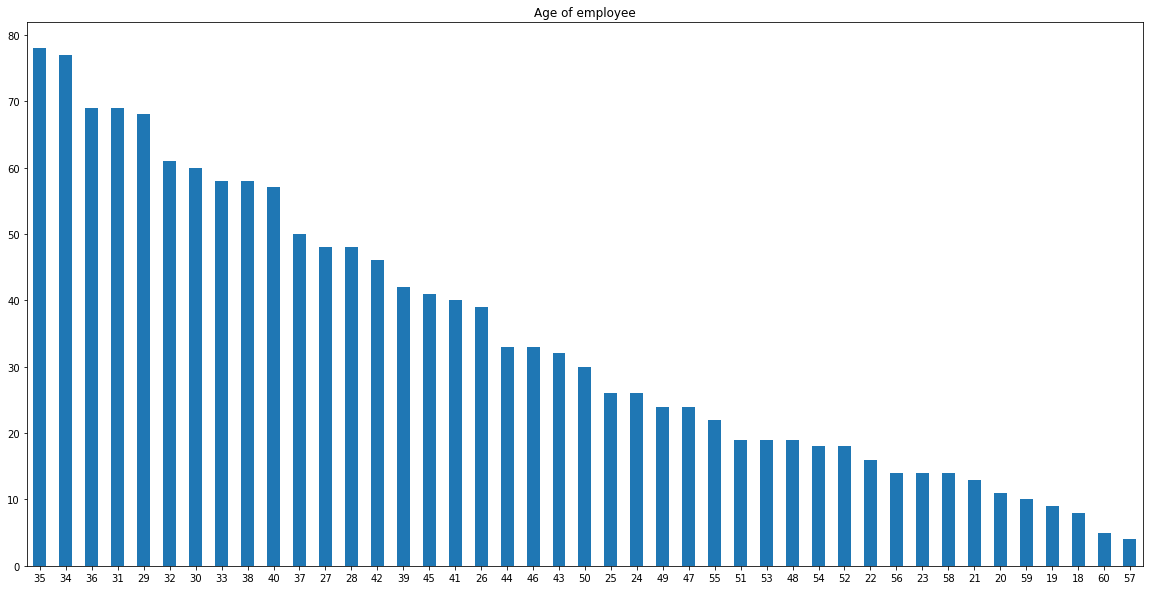

In [15]:
plt.subplot()
df['Age'].value_counts().plot(kind='bar' , title='Age of employee' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

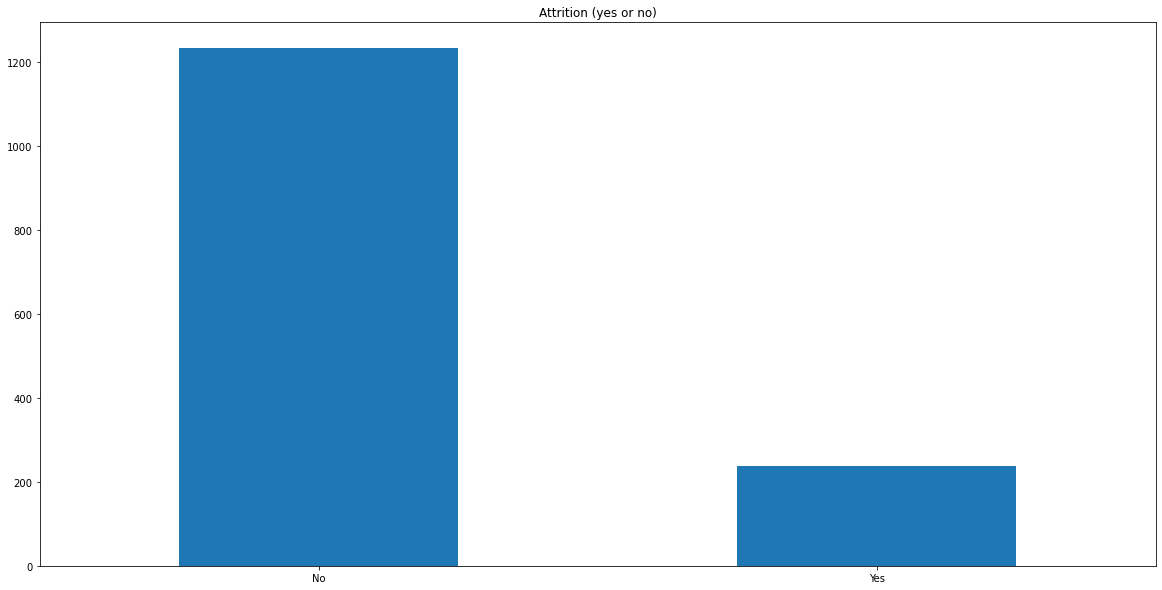

In [16]:
plt.subplot()
df['Attrition'].value_counts().plot(kind='bar' , title='Attrition (yes or no)' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

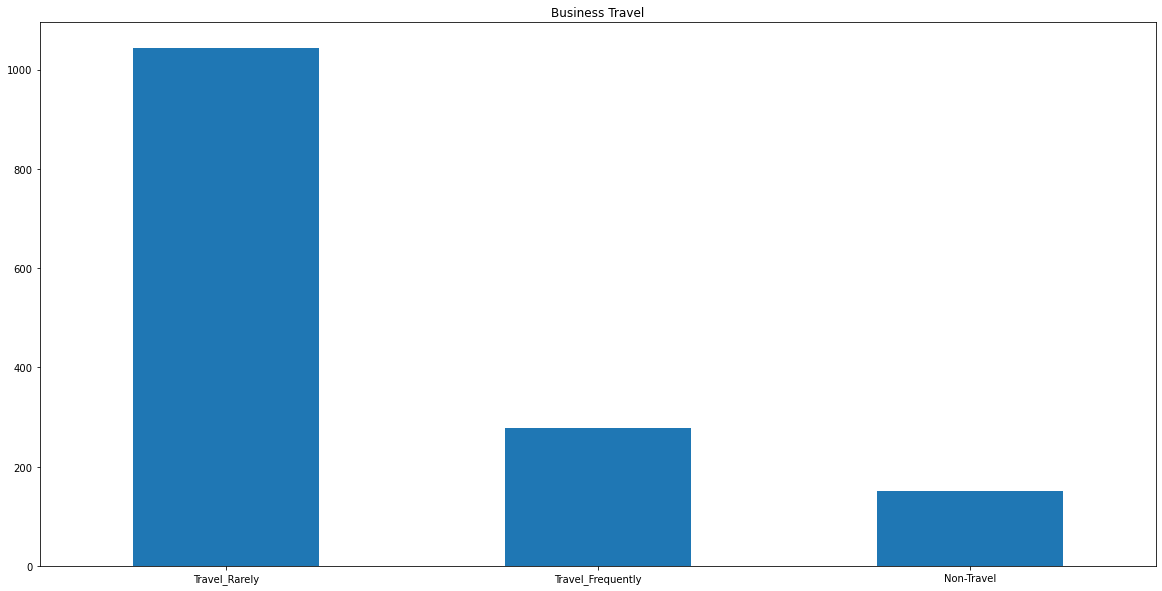

In [17]:
plt.subplot()
df['BusinessTravel'].value_counts().plot(kind='bar' , title='Business Travel' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

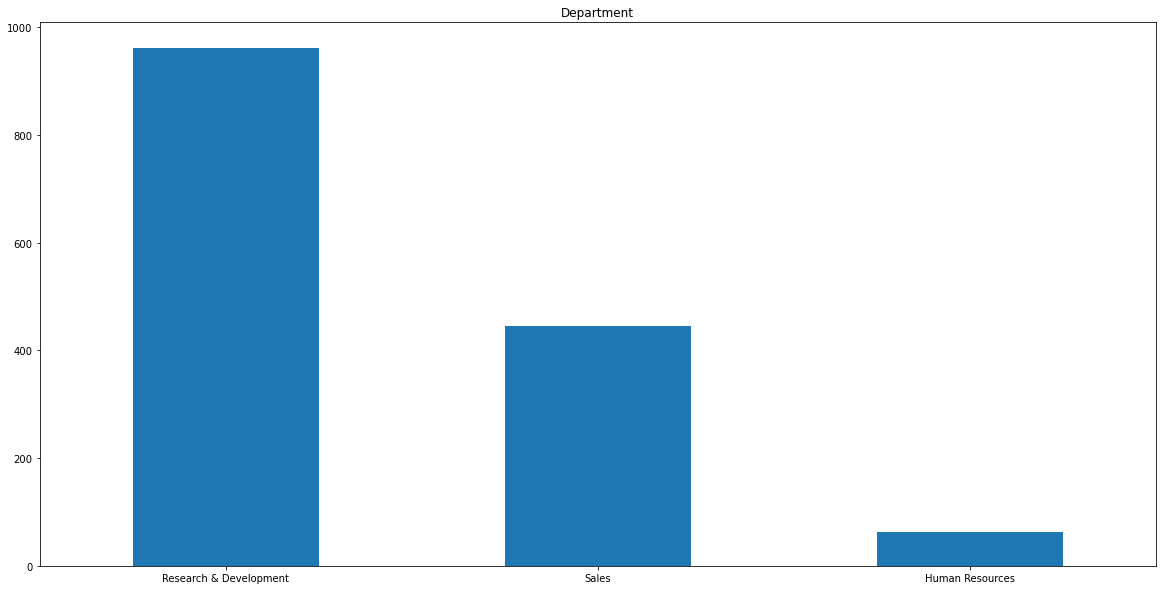

In [18]:
plt.subplot()
df['Department'].value_counts().plot(kind='bar' , title='Department' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

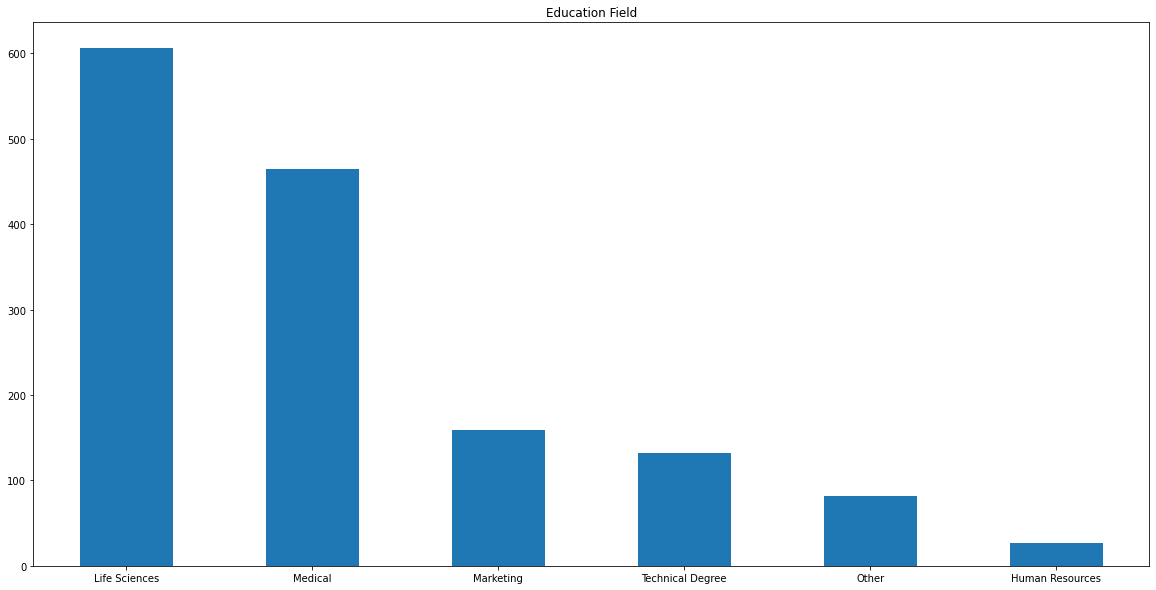

In [19]:
plt.subplot()
df['EducationField'].value_counts().plot(kind='bar' , title='Education Field' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

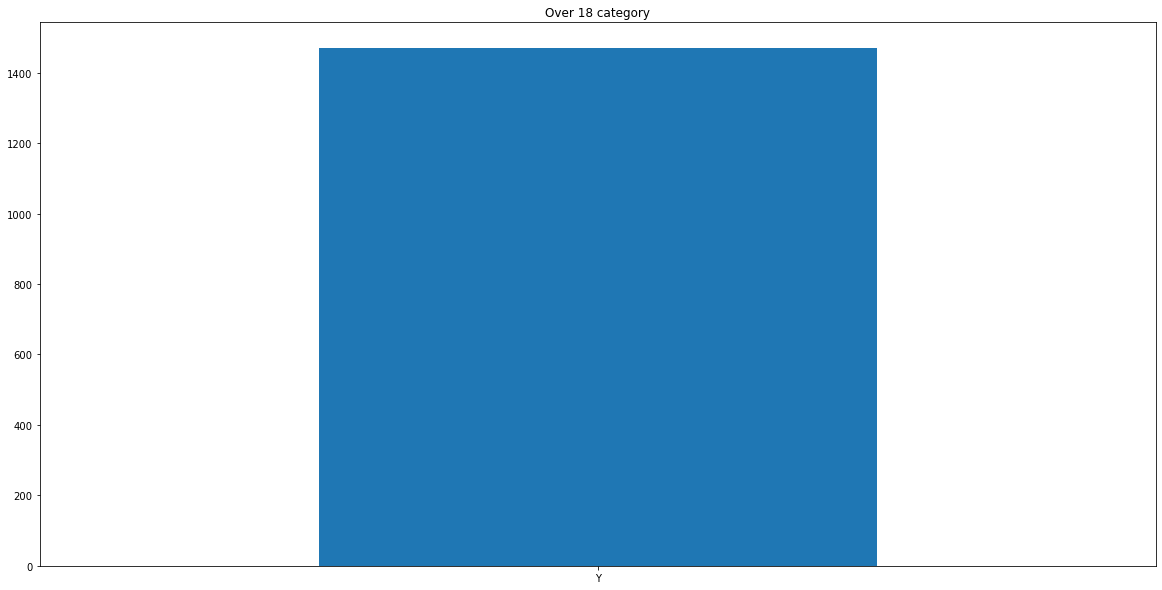

In [20]:
plt.subplot()
df['Over18'].value_counts().plot(kind='bar' , title='Over 18 category' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

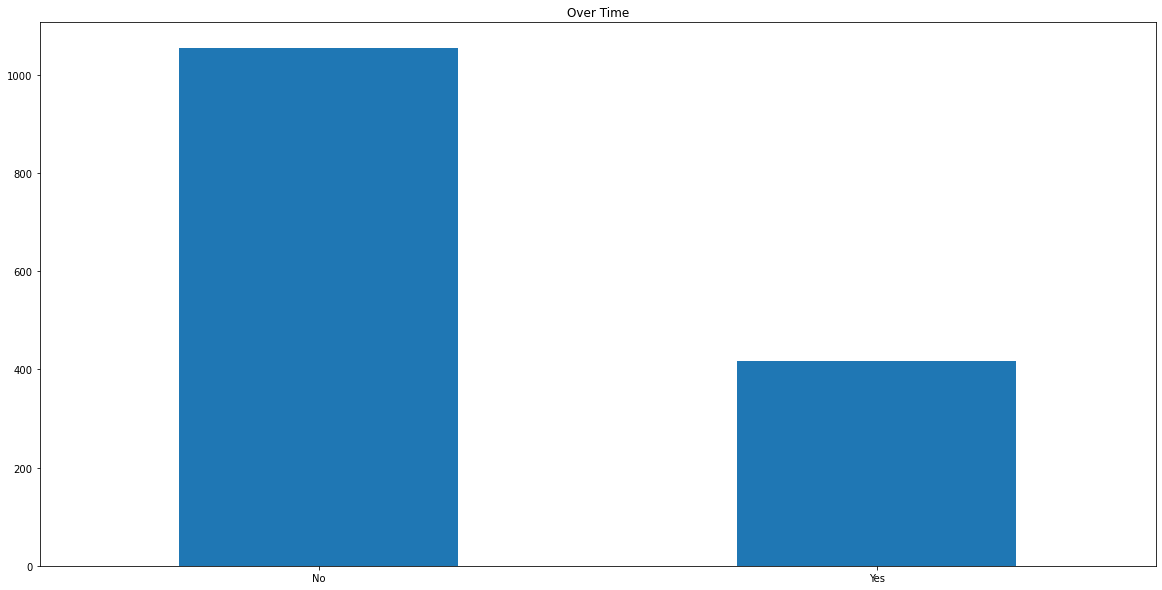

In [21]:
plt.subplot()
df['OverTime'].value_counts().plot(kind='bar' , title='Over Time' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

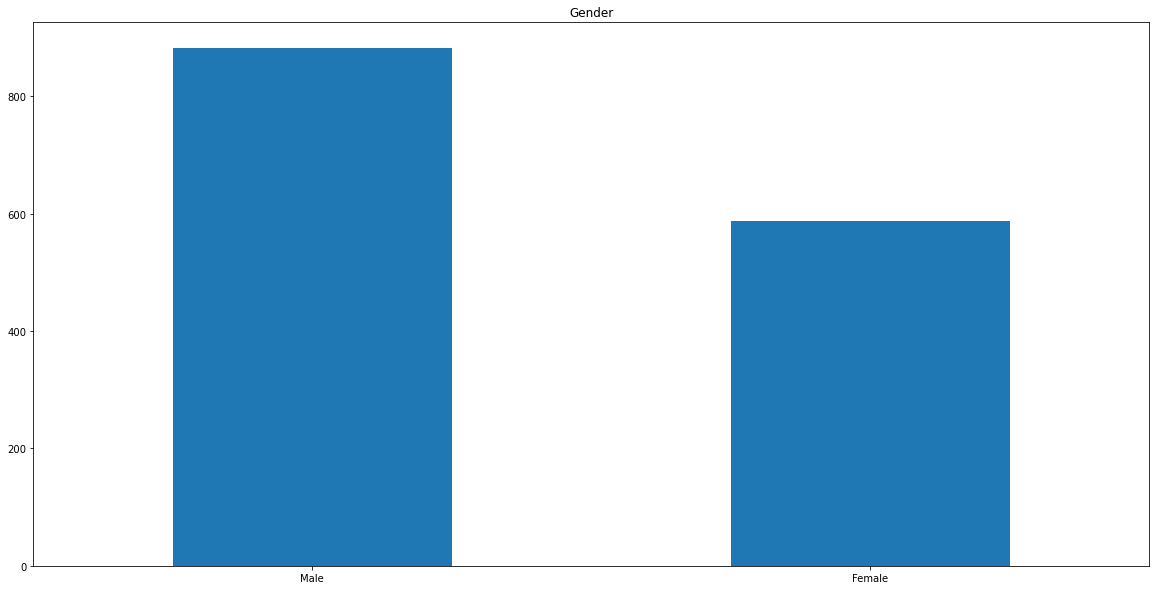

In [22]:
plt.subplot()
df['Gender'].value_counts().plot(kind='bar' , title='Gender' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

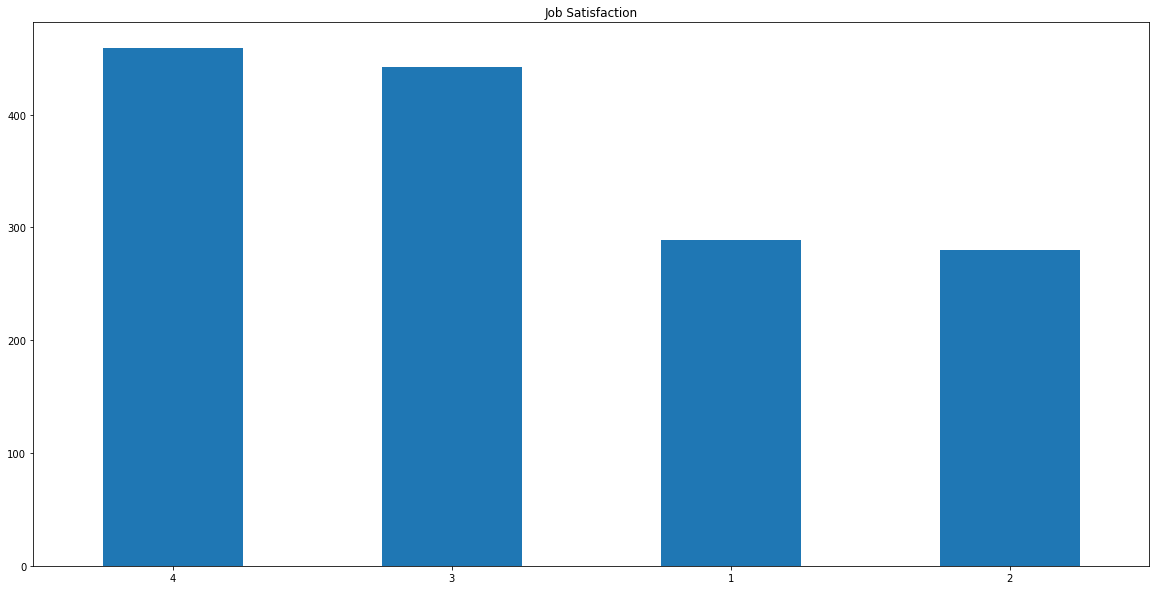

In [23]:
plt.subplot()
df['JobSatisfaction'].value_counts().plot(kind='bar' , title='Job Satisfaction' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

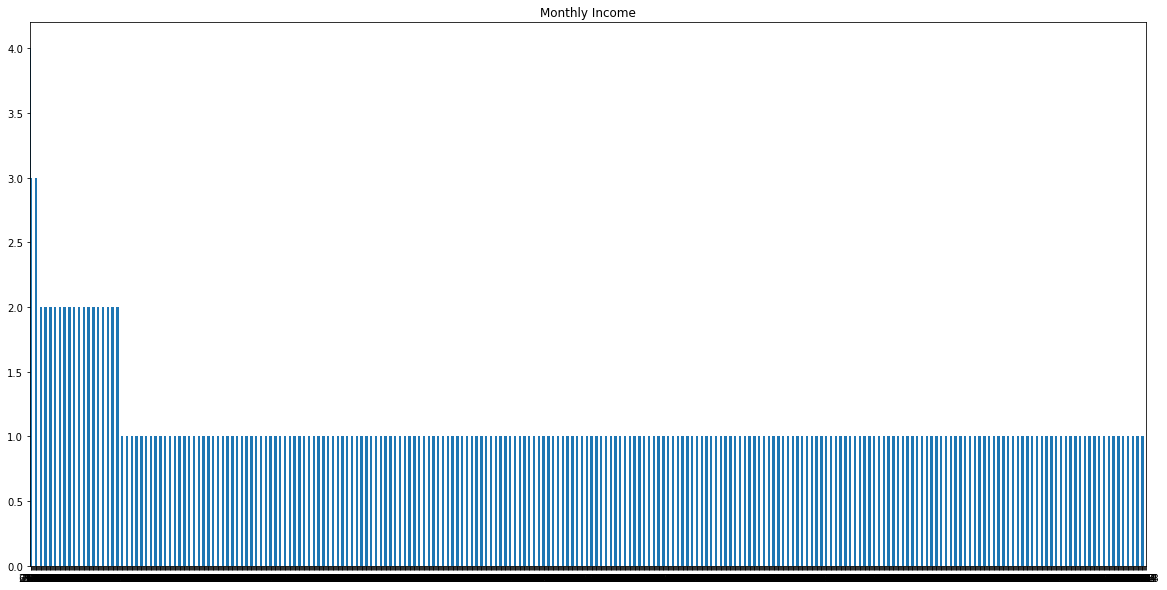

In [24]:
plt.subplot()
df['MonthlyIncome'].value_counts().plot(kind='bar' , title='Monthly Income' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

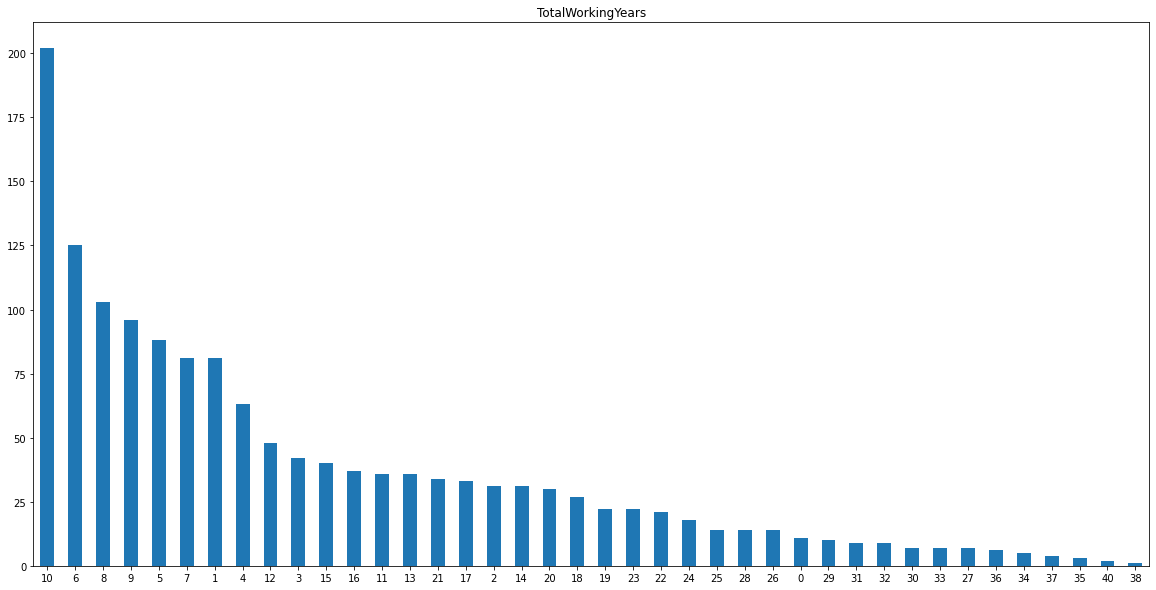

In [25]:
plt.subplot()
df['TotalWorkingYears'].value_counts().plot(kind='bar' , title='TotalWorkingYears' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

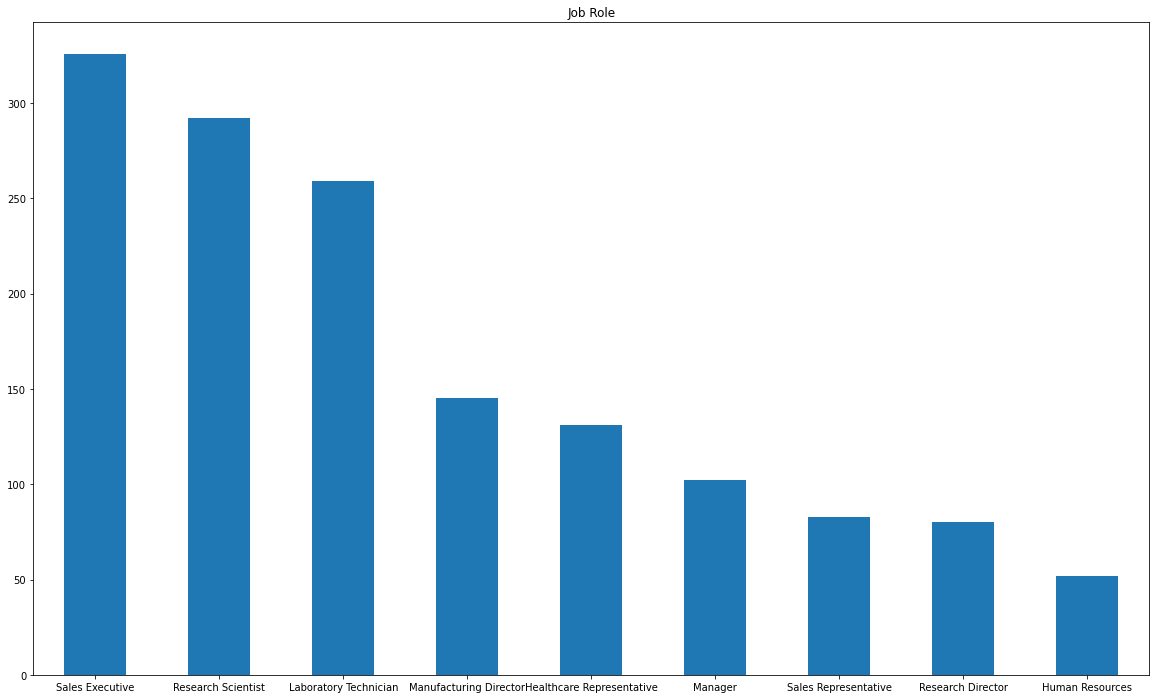

In [26]:
plt.subplot()
df['JobRole'].value_counts().plot(kind='bar' , title='Job Role' , figsize=(20,12))
plt.xticks(rotation=0)
plt.show()

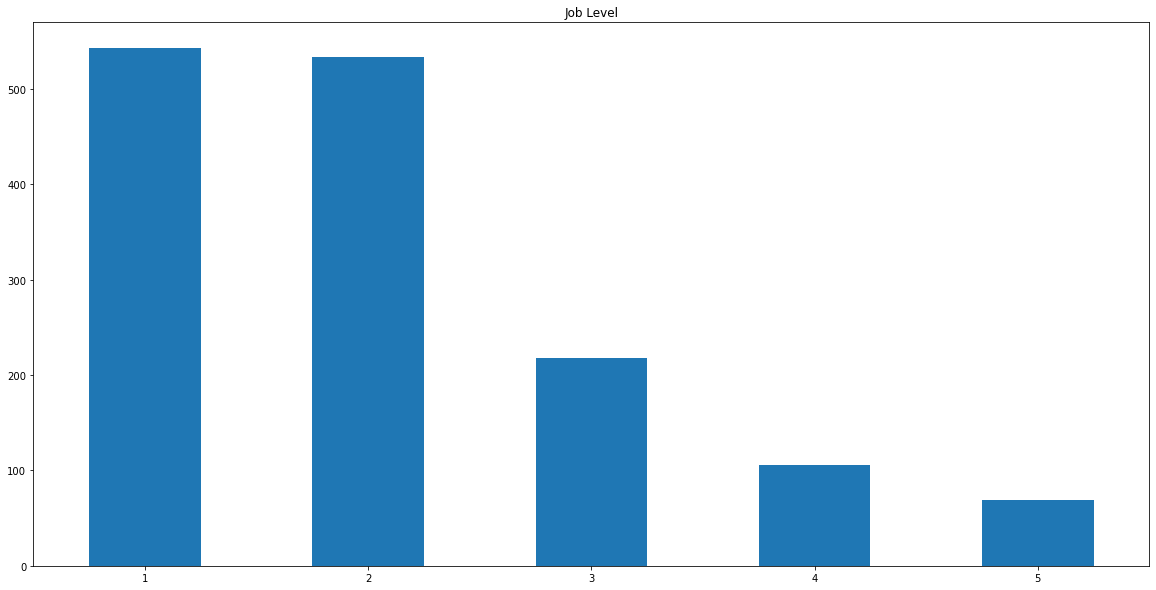

In [27]:
plt.subplot()
df['JobLevel'].value_counts().plot(kind='bar' , title='Job Level' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

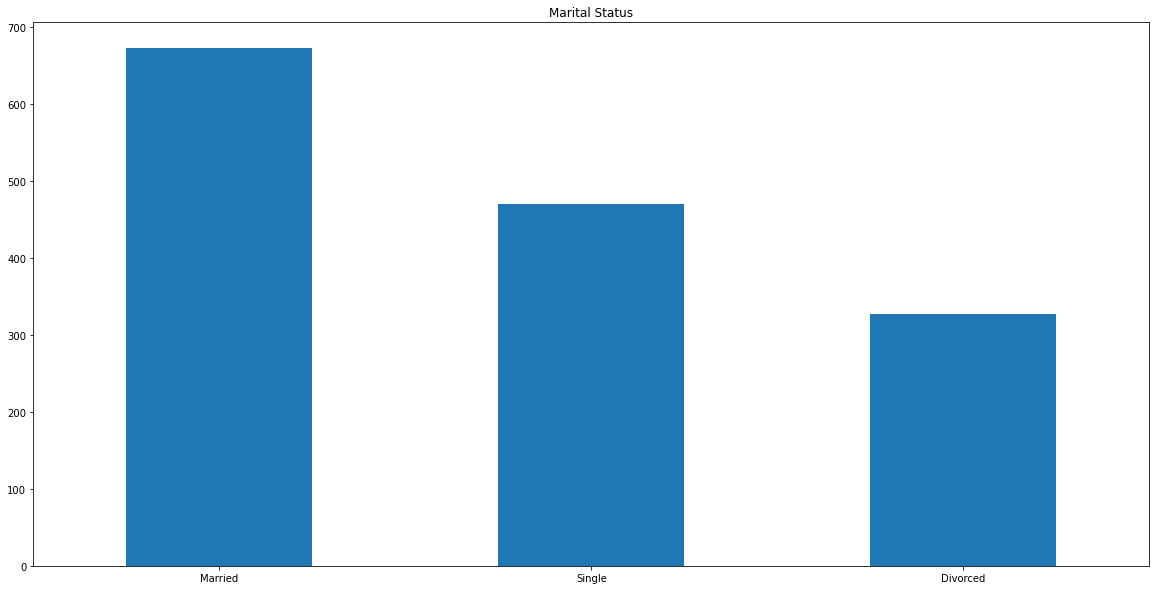

In [28]:
plt.subplot()
df['MaritalStatus'].value_counts().plot(kind='bar' , title='Marital Status' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

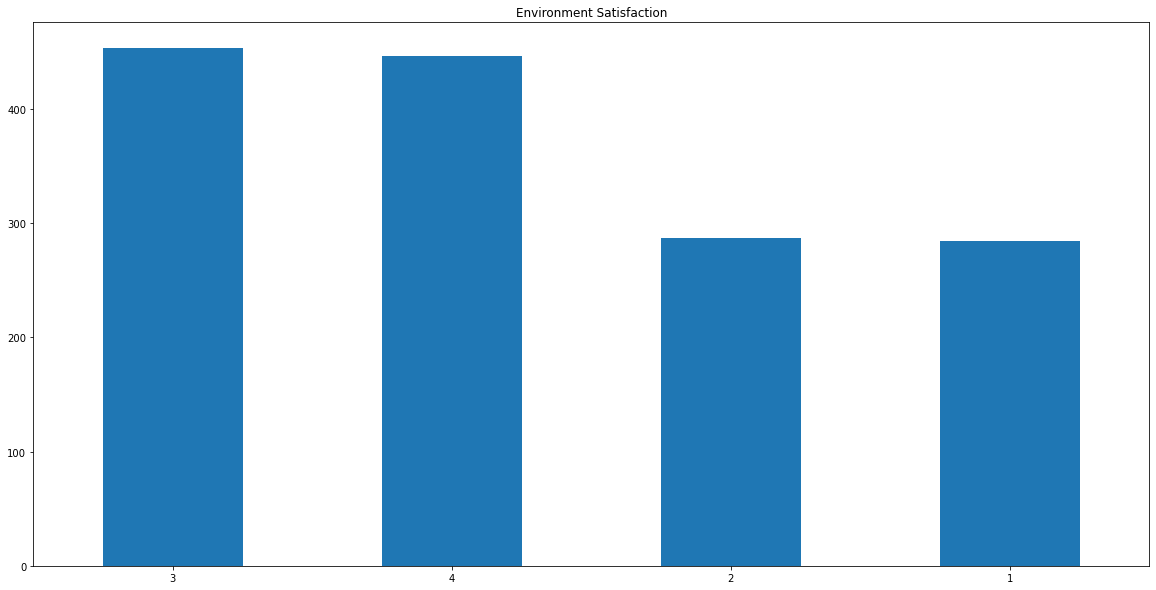

In [29]:
plt.subplot()
df['EnvironmentSatisfaction'].value_counts().plot(kind='bar' , title='Environment Satisfaction' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

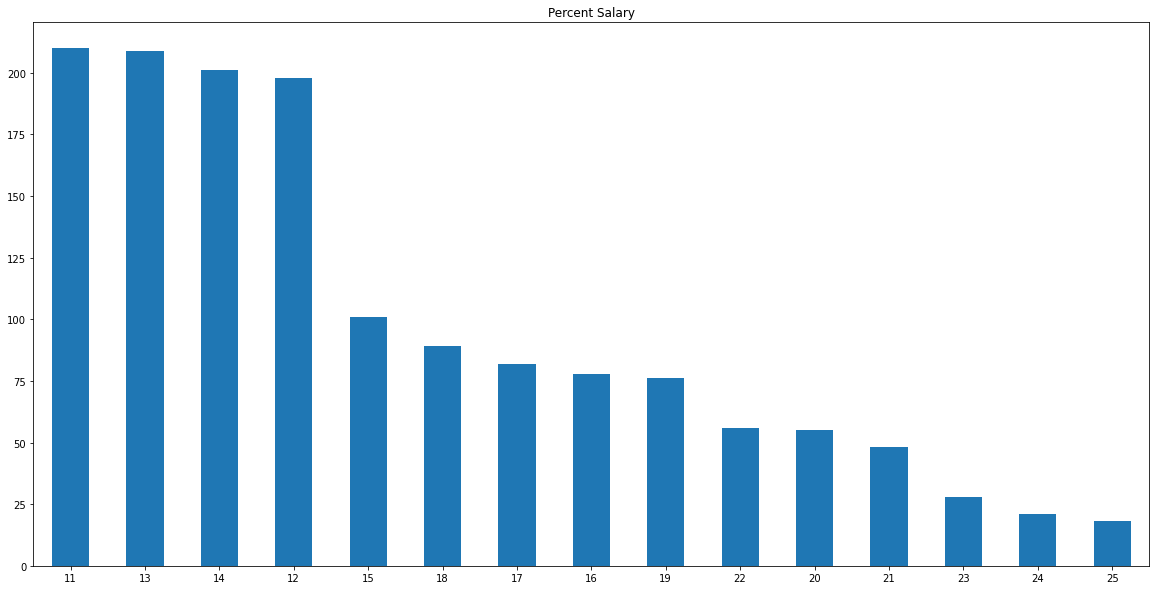

In [30]:
plt.subplot()
df['PercentSalaryHike'].value_counts().plot(kind='bar' , title='Percent Salary' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

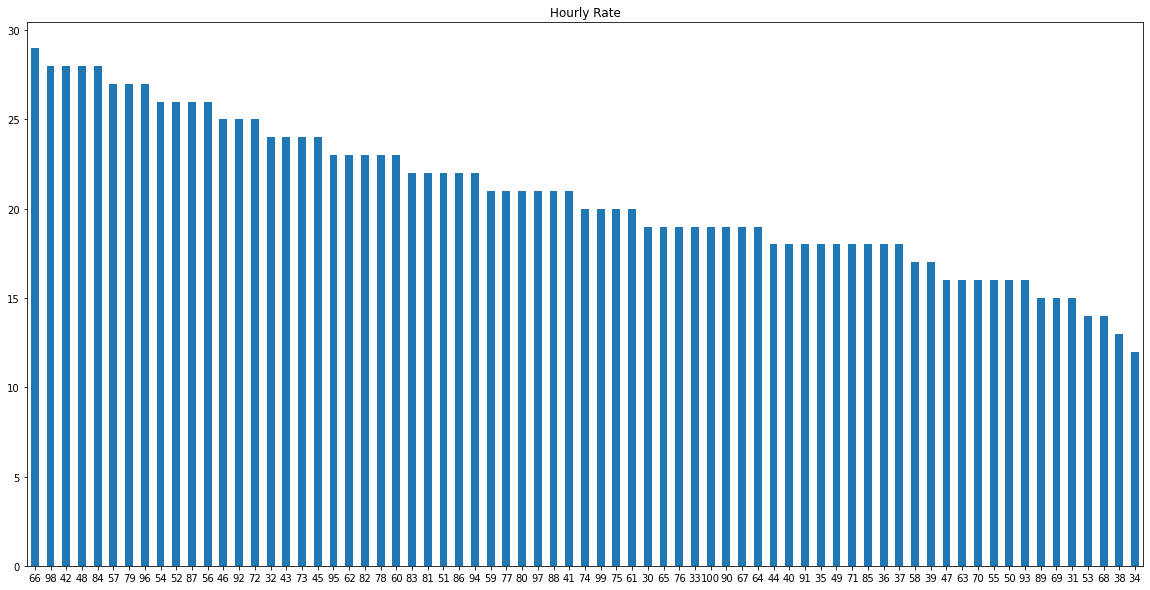

In [31]:
plt.subplot()
df['HourlyRate'].value_counts().plot(kind='bar' , title='Hourly Rate' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

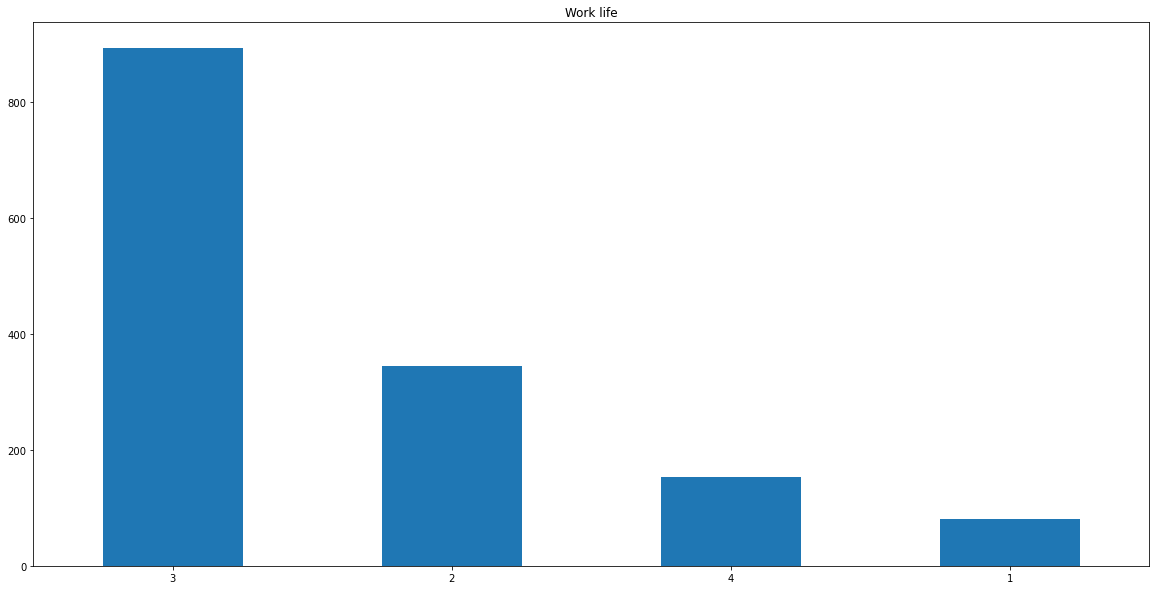

In [32]:
plt.subplot()
df['WorkLifeBalance'].value_counts().plot(kind='bar' , title='Work life' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

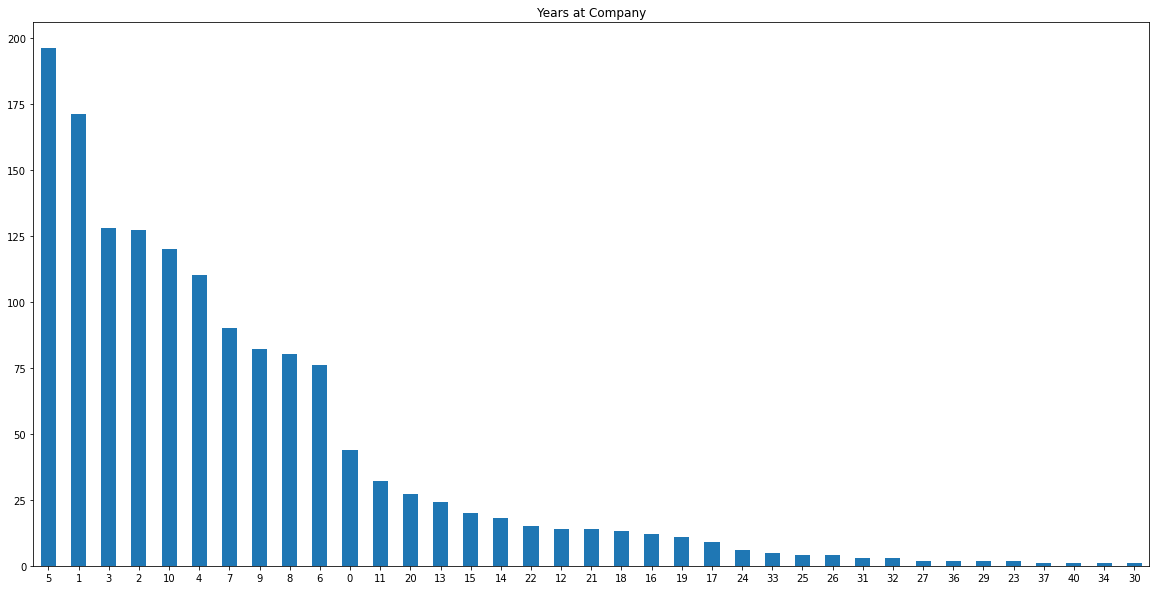

In [33]:
plt.subplot()
df['YearsAtCompany'].value_counts().plot(kind='bar' , title='Years at Company' , figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

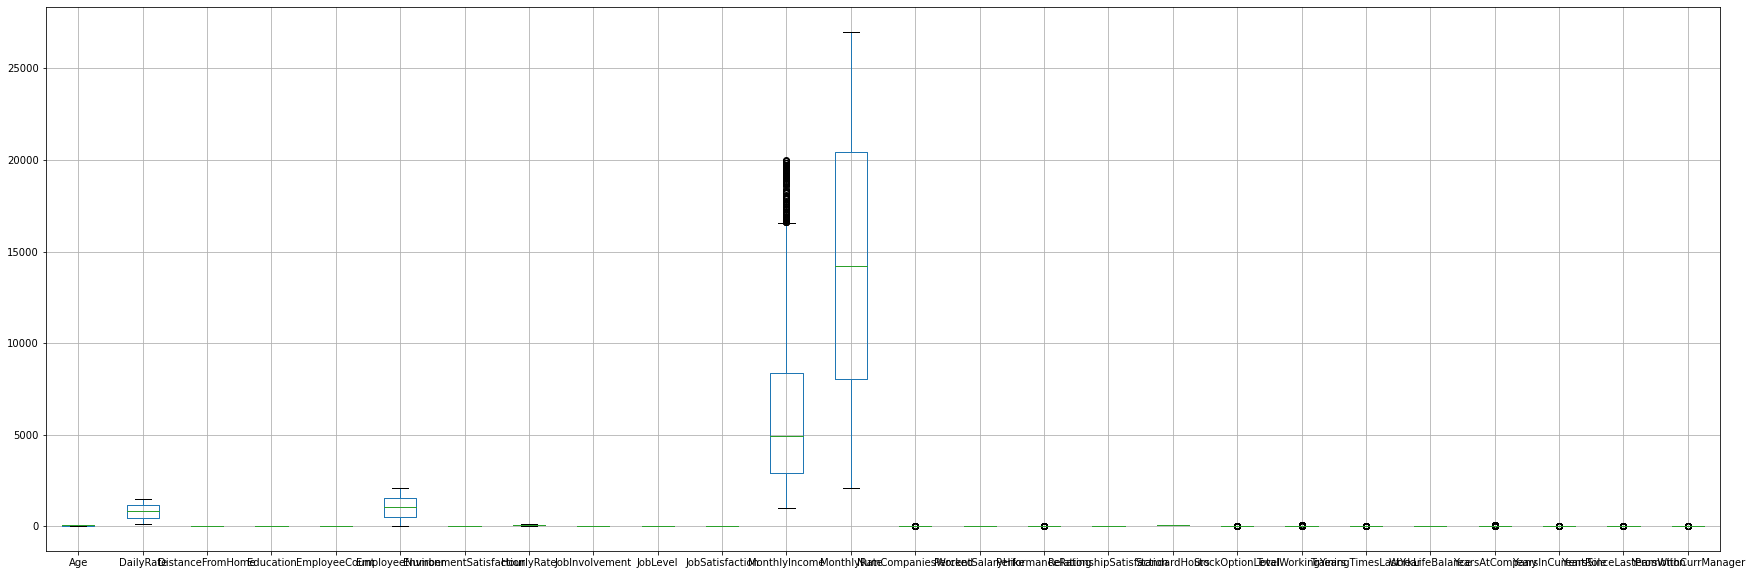

In [34]:
plt.figure(figsize=(30,10))
df.boxplot()

<AxesSubplot:xlabel='Age', ylabel='Density'>

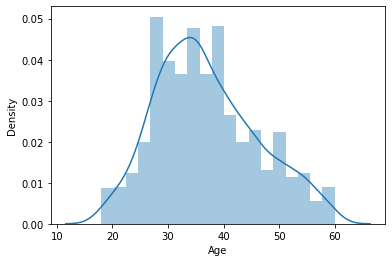

In [35]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

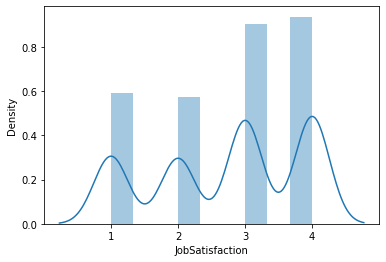

In [36]:
sns.distplot(df['JobSatisfaction'])

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

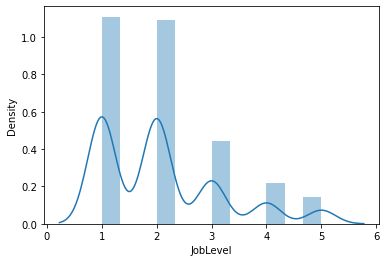

In [37]:
sns.distplot(df['JobLevel'])

<AxesSubplot:xlabel='EmployeeCount', ylabel='Density'>

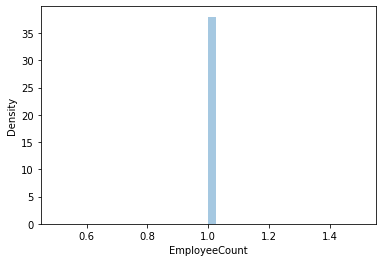

In [38]:
sns.distplot(df['EmployeeCount'])

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

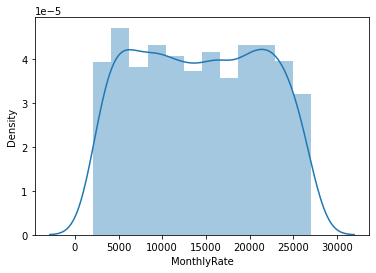

In [39]:
sns.distplot(df['MonthlyRate'])

<AxesSubplot:xlabel='StandardHours', ylabel='Density'>

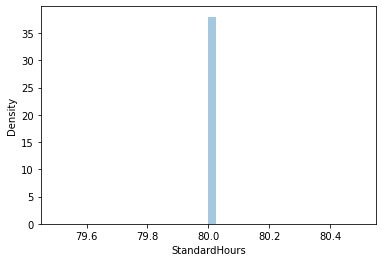

In [40]:
sns.distplot(df['StandardHours'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

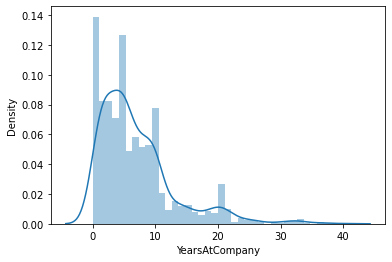

In [41]:
sns.distplot(df['YearsAtCompany'])

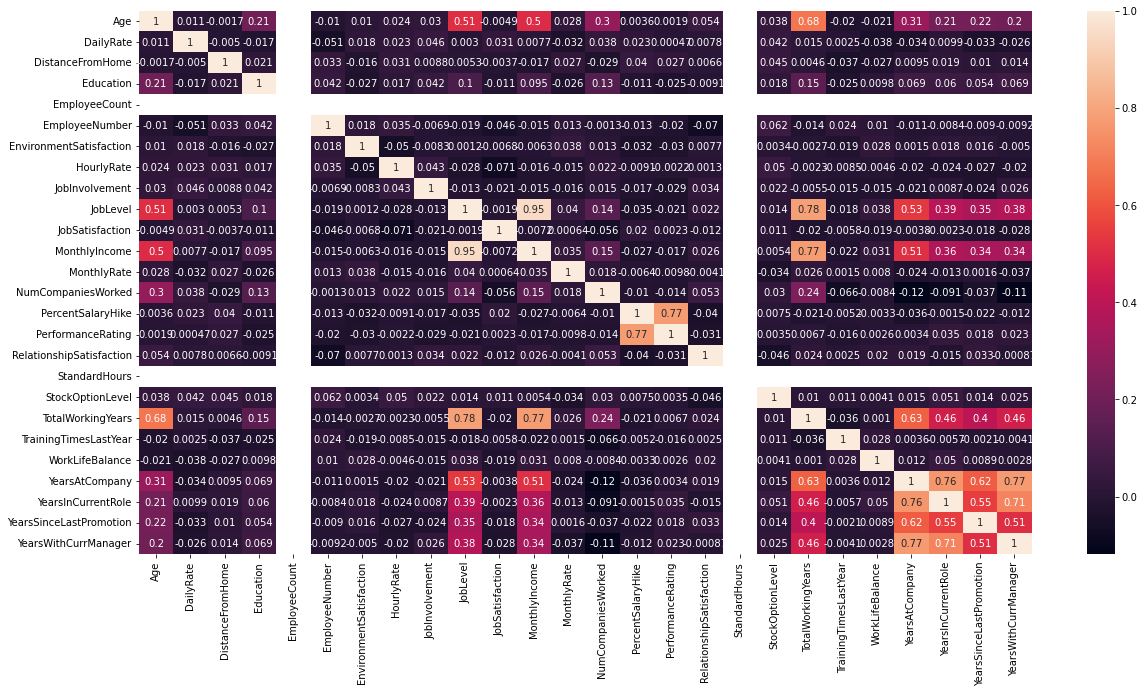

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=0)
plt.show()

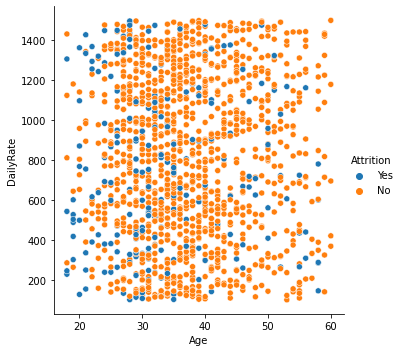

In [43]:
sns.relplot(x='Age' , y='DailyRate' , hue='Attrition' , data=df);

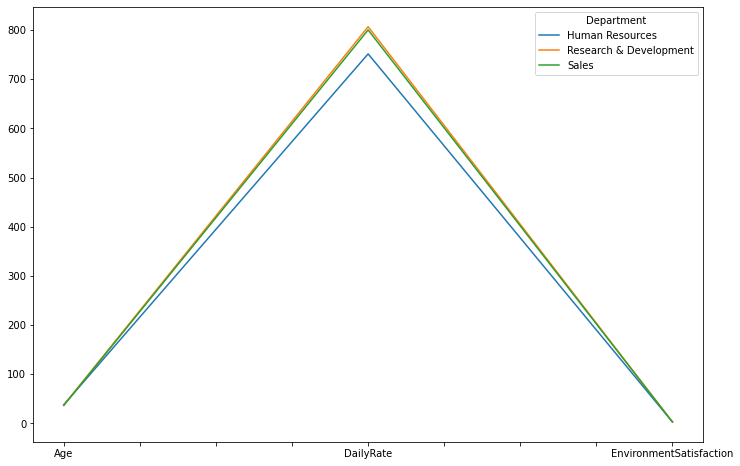

In [44]:
df.groupby('Department')[['Age' , 'DailyRate' , 'EnvironmentSatisfaction']].mean().T.plot(figsize=(12,8));

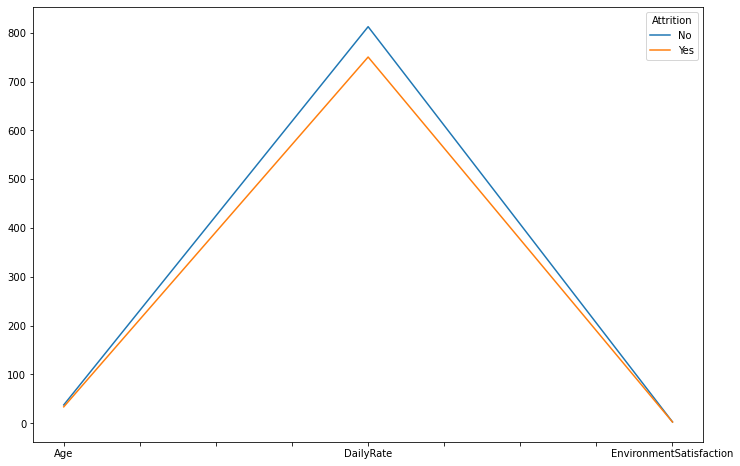

In [45]:
df.groupby('Attrition')[['Age' , 'DailyRate' , 'EnvironmentSatisfaction']].mean().T.plot(figsize=(12,8));

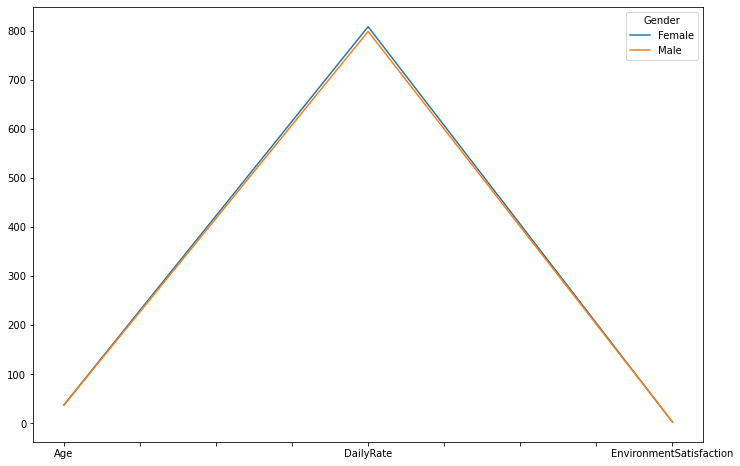

In [46]:
df.groupby('Gender')[['Age' , 'DailyRate' , 'EnvironmentSatisfaction']].mean().T.plot(figsize=(12,8));

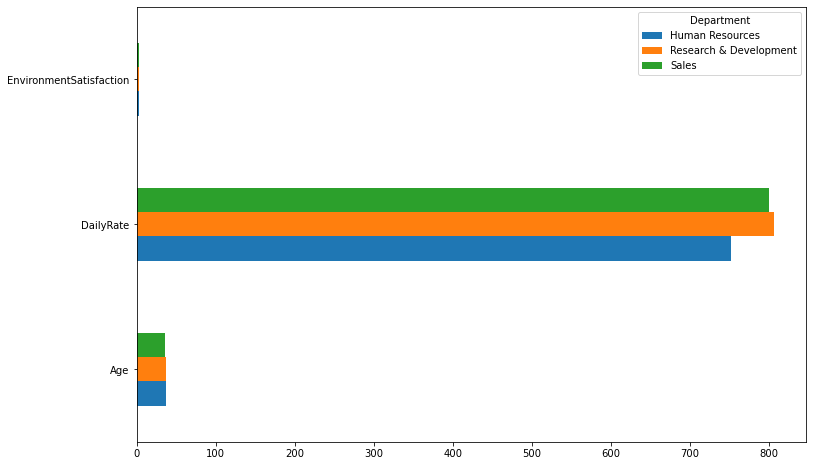

In [47]:
df.groupby('Department')[['Age' , 'DailyRate' , 'EnvironmentSatisfaction']].mean().T.plot(kind='barh' , figsize=(12,8));

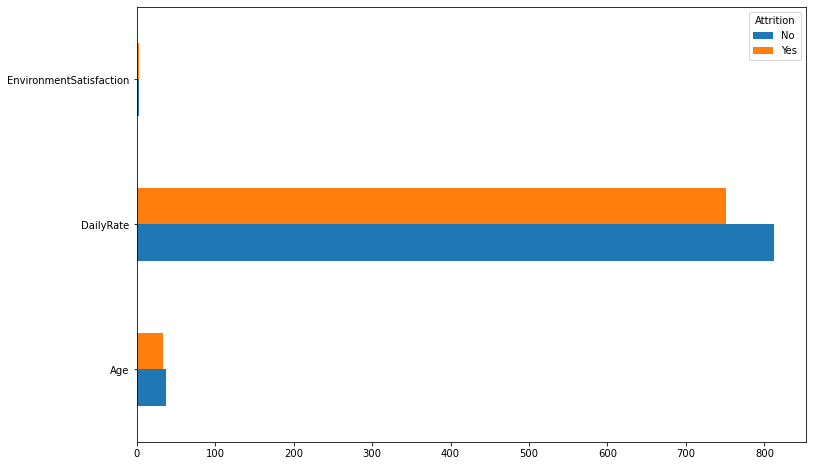

In [48]:
df.groupby('Attrition')[['Age' , 'DailyRate' , 'EnvironmentSatisfaction']].mean().T.plot(kind='barh' , figsize=(12,8));

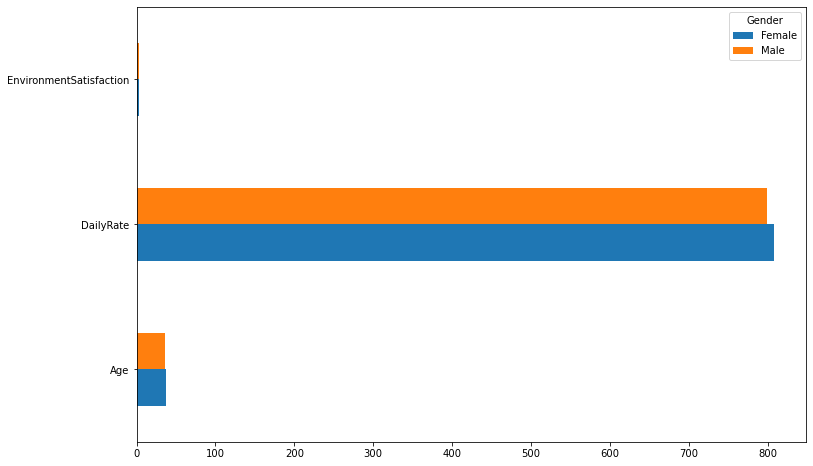

In [49]:
df.groupby('Gender')[['Age' , 'DailyRate' , 'EnvironmentSatisfaction']].mean().T.plot(kind='barh' , figsize=(12,8));

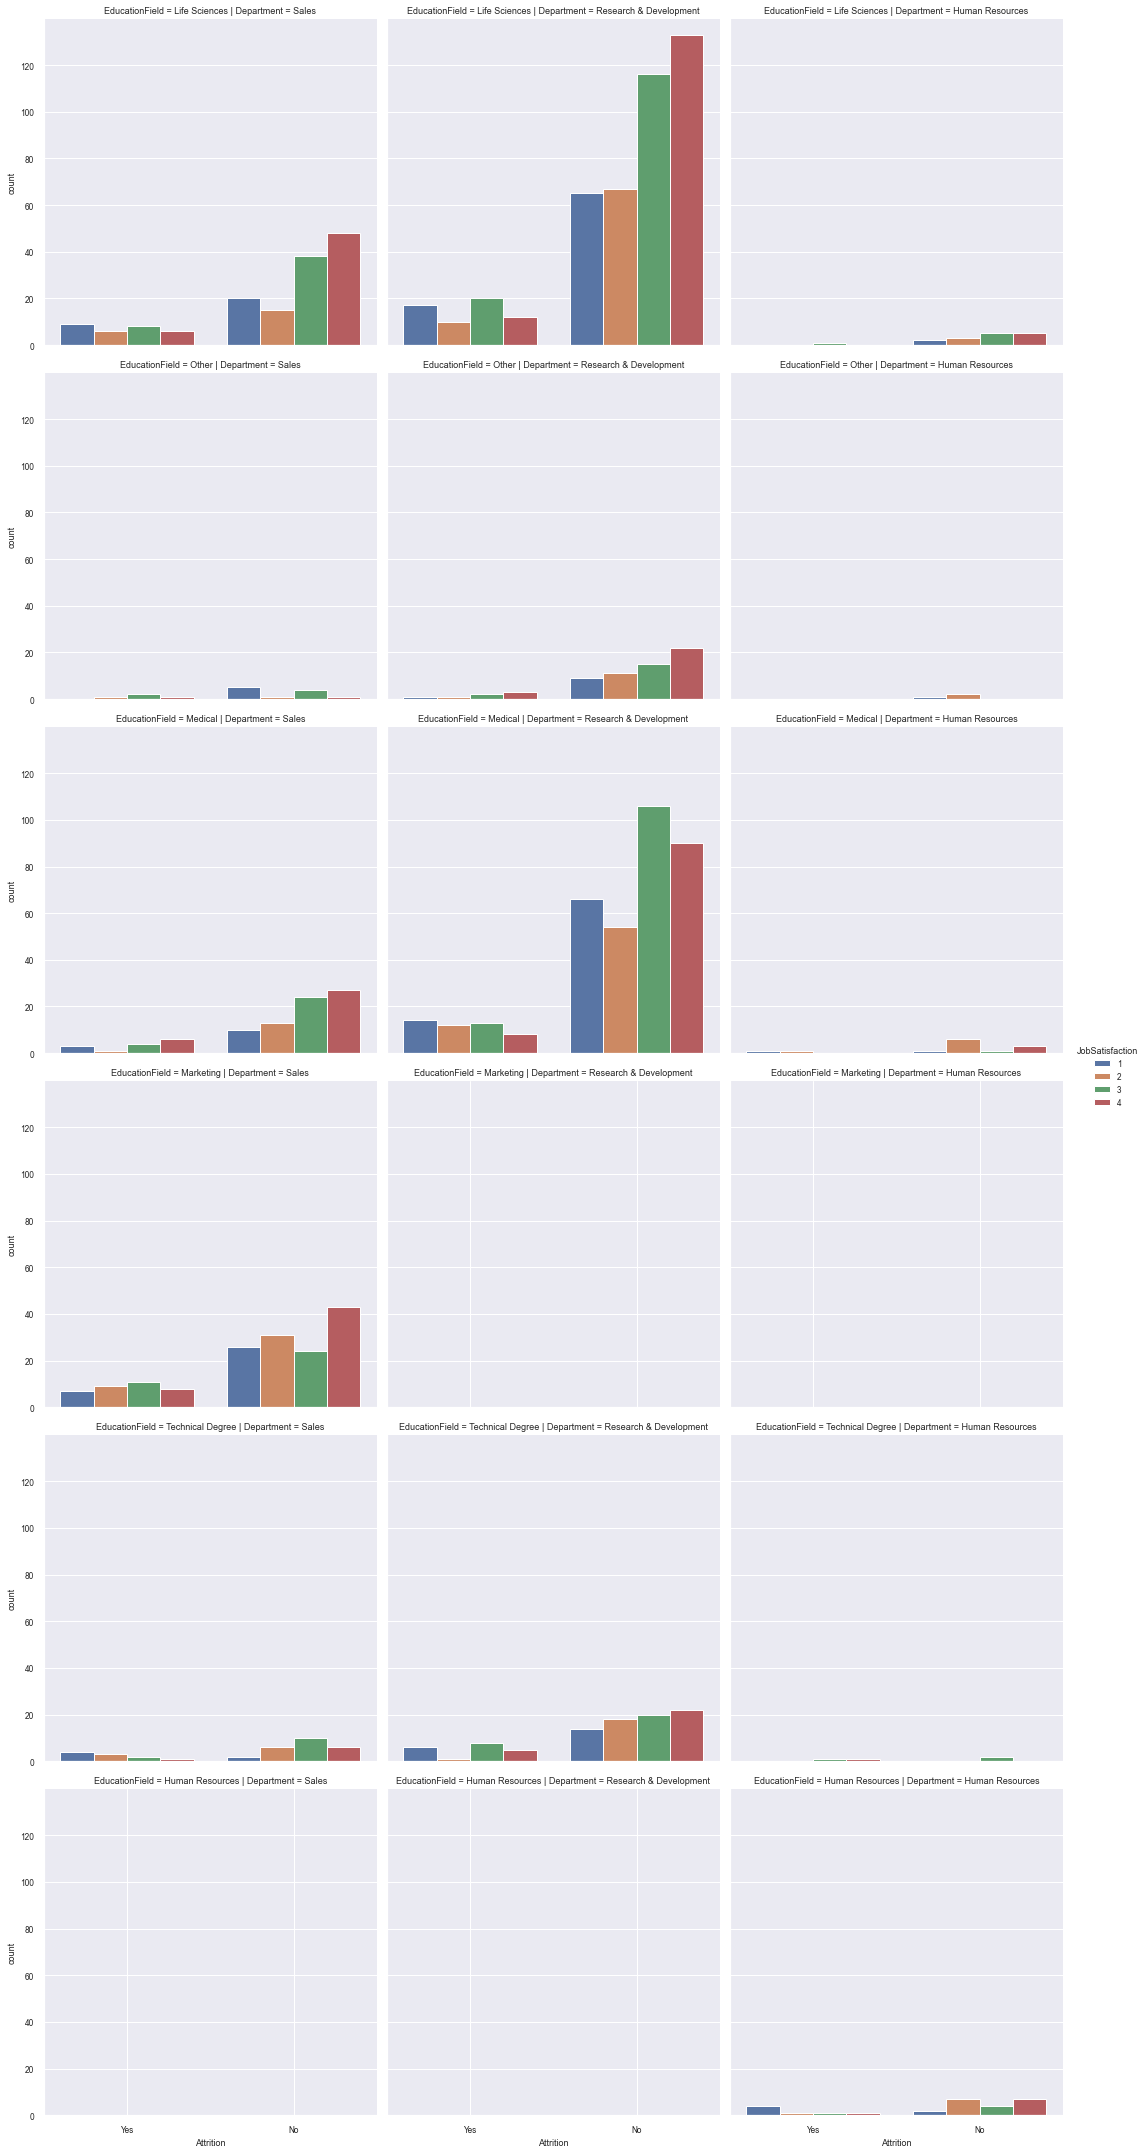

In [50]:
sns.set_theme(style="darkgrid", font_scale = 0.75)
g=sns.catplot(x="Attrition" , hue = 'JobSatisfaction' , row = 'EducationField' , col = 'Department' , data = df, kind = 'count', ci=None)

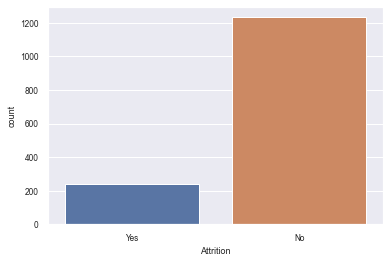

In [51]:
sns.set_style('darkgrid')
sns.countplot(x = 'Attrition' , data=df);

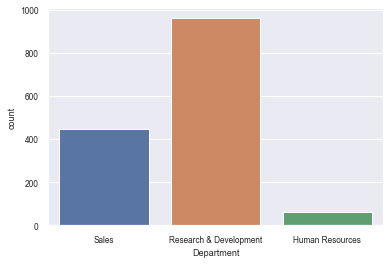

In [52]:
sns.set_style('darkgrid')
sns.countplot(x = 'Department' , data=df);

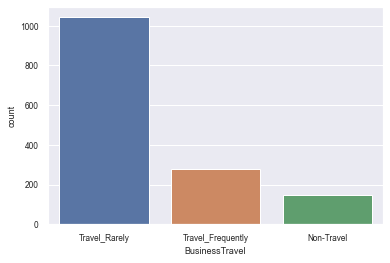

In [53]:
sns.set_style('darkgrid')
sns.countplot(x = 'BusinessTravel' , data=df);

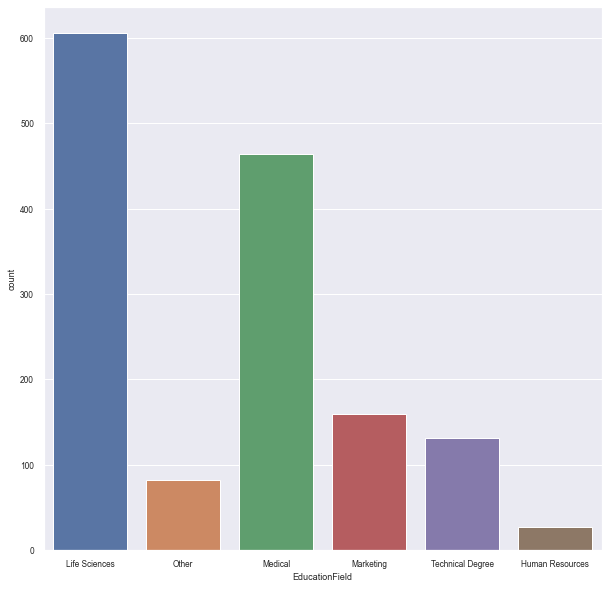

In [54]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x = 'EducationField' , data=df);

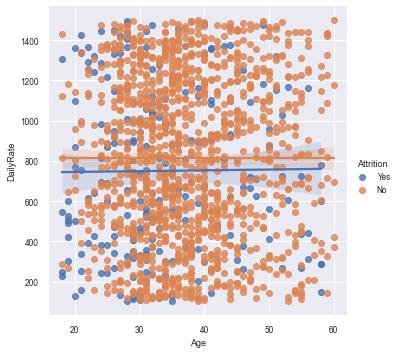

In [55]:
sns.lmplot(x = 'Age' , y = 'DailyRate' , hue = 'Attrition' , data=df);

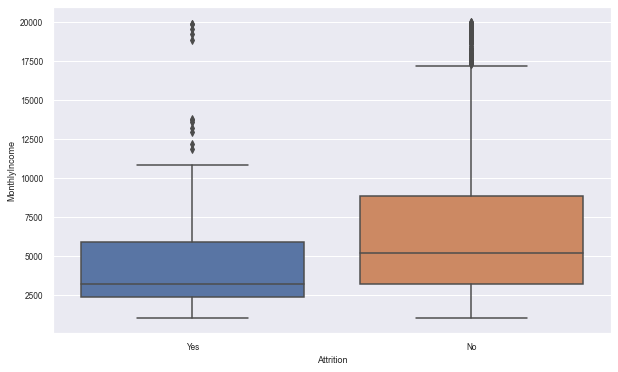

In [56]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = df);

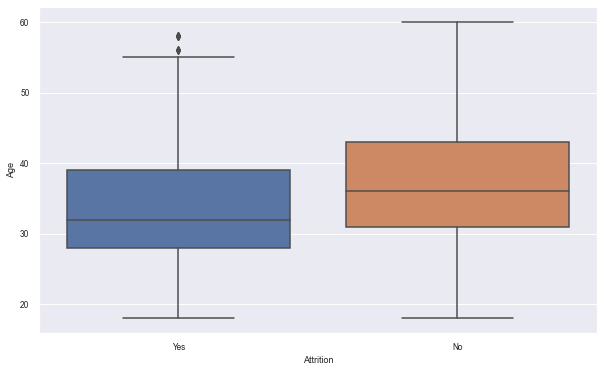

In [57]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='Age', x ='Attrition', data = df);

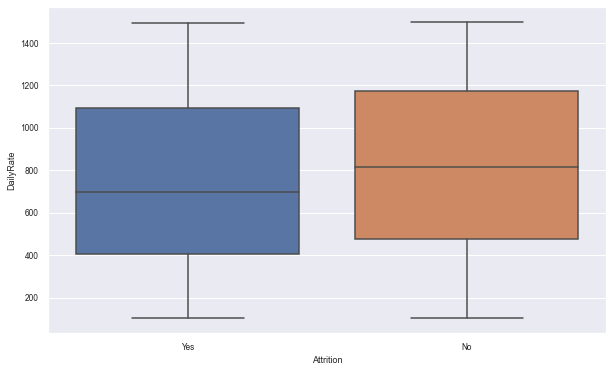

In [58]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='DailyRate', x ='Attrition', data = df);

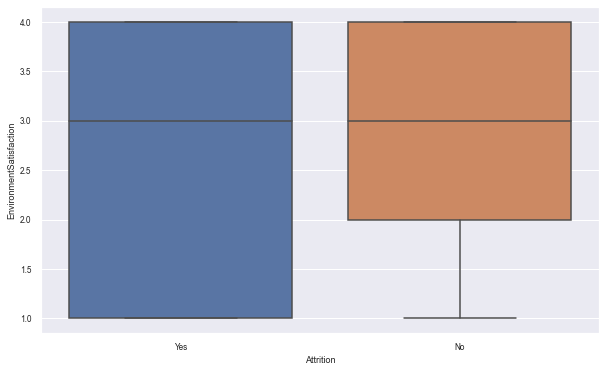

In [59]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='EnvironmentSatisfaction', x ='Attrition', data = df);

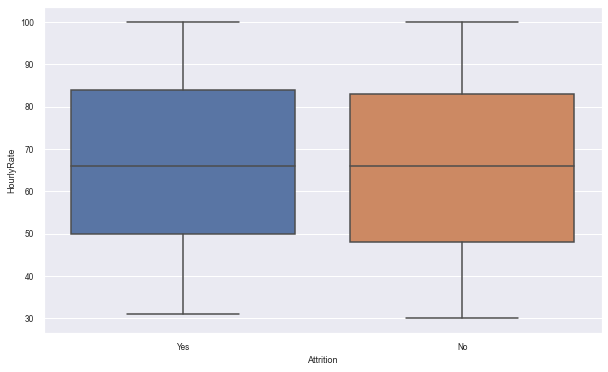

In [60]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='HourlyRate', x ='Attrition', data = df);

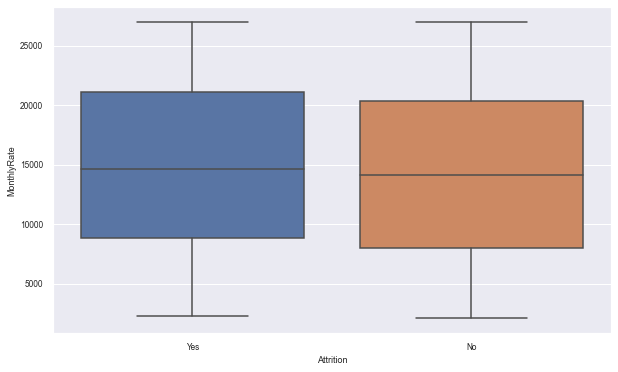

In [61]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyRate', x ='Attrition', data = df);

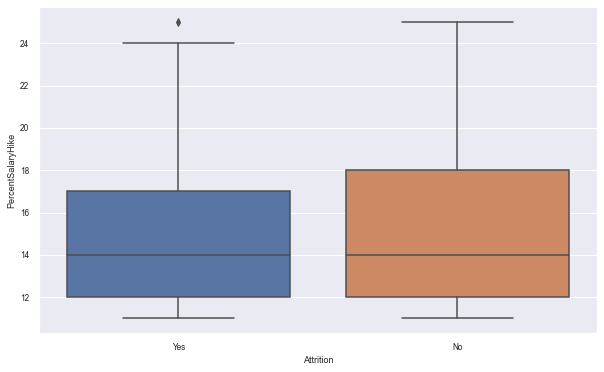

In [62]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='PercentSalaryHike', x ='Attrition', data = df);

In [63]:
#dropping the columns 
df = df.drop(columns=['Over18' , 'StandardHours' , 'EmployeeCount' , 'EmployeeNumber'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

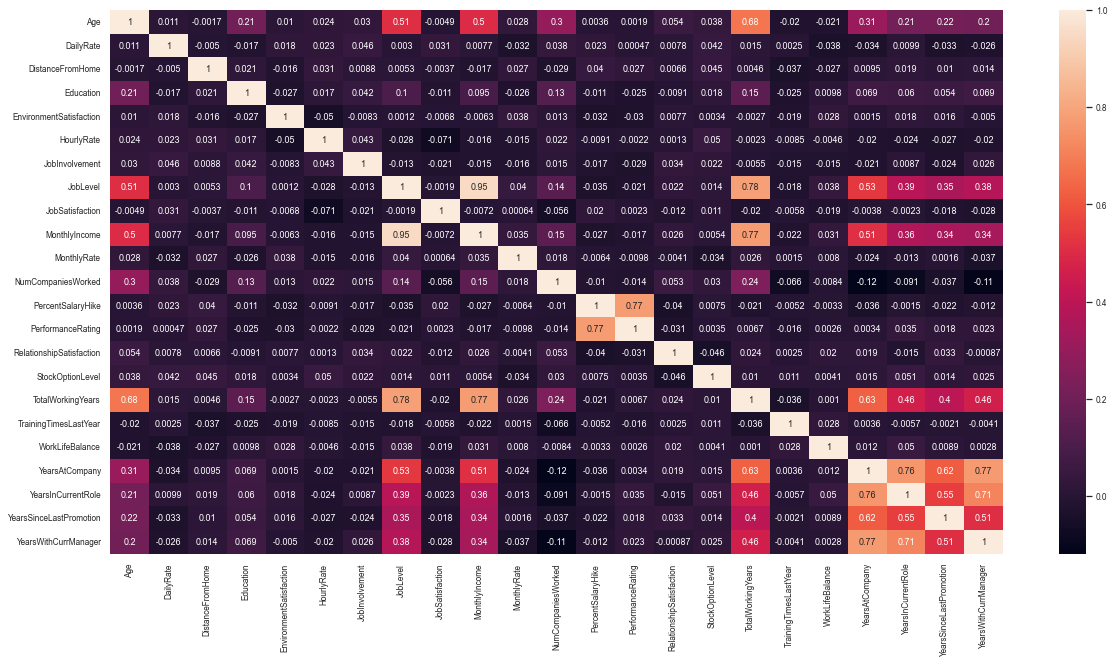

In [64]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

In [65]:
df.corr().T

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [66]:
type(df.corr())

pandas.core.frame.DataFrame

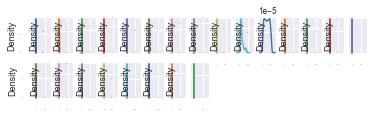

In [67]:
#data distribution
df.plot(kind='density', subplots=True, layout=(5,15),  legend=False, fontsize=-1 )
plt.show()

In [69]:
df.groupby('Department')['Age'].agg(np.mean).sort_values(ascending=False)

Department
Human Resources           37.809524
Research & Development    37.042664
Sales                     36.542601
Name: Age, dtype: float64

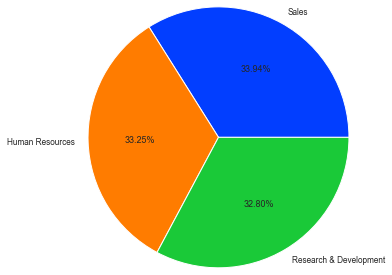

In [70]:
# making piechart to show what percent having these in the section to be distributed

exp_val=[37.809524, 37.042664, 36.542601]
exp_label=['Sales' , 'Human Resources' ,'Research & Development']
palette_color = sns.color_palette('bright')
plt.pie(exp_val,labels=exp_label,radius=1.5,colors=palette_color,autopct='%0.2f%%');

(1470,)

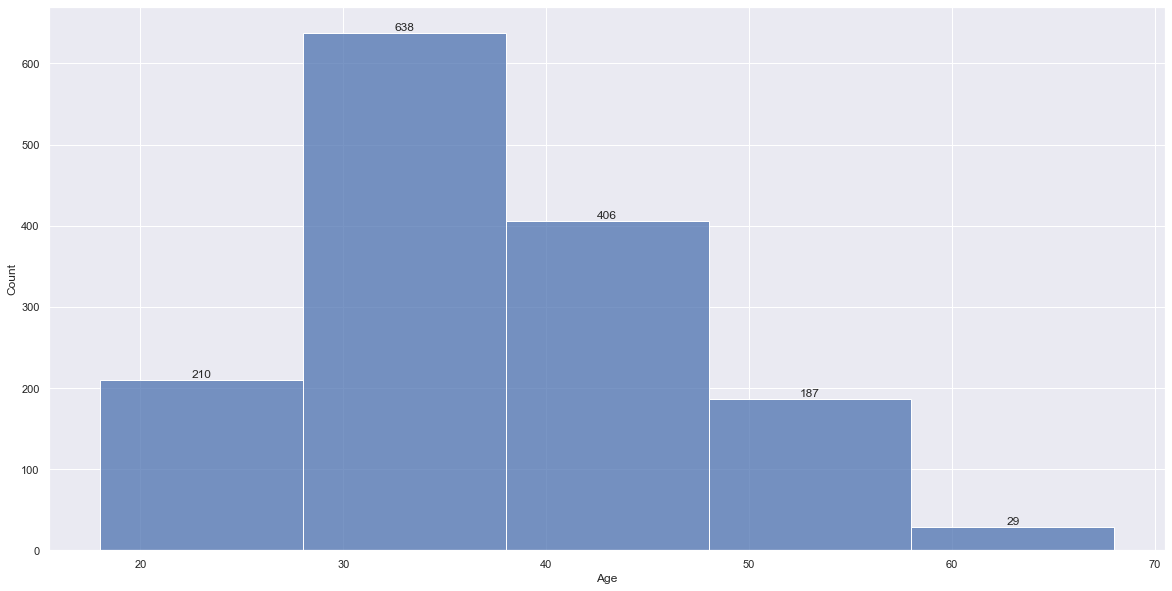

In [71]:
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
ax = sns.histplot(data=df, x=df["Age"], binwidth=10, palette='rocket')
for i in ax.containers:
    ax.bar_label(i,)
    
df['Age'].shape

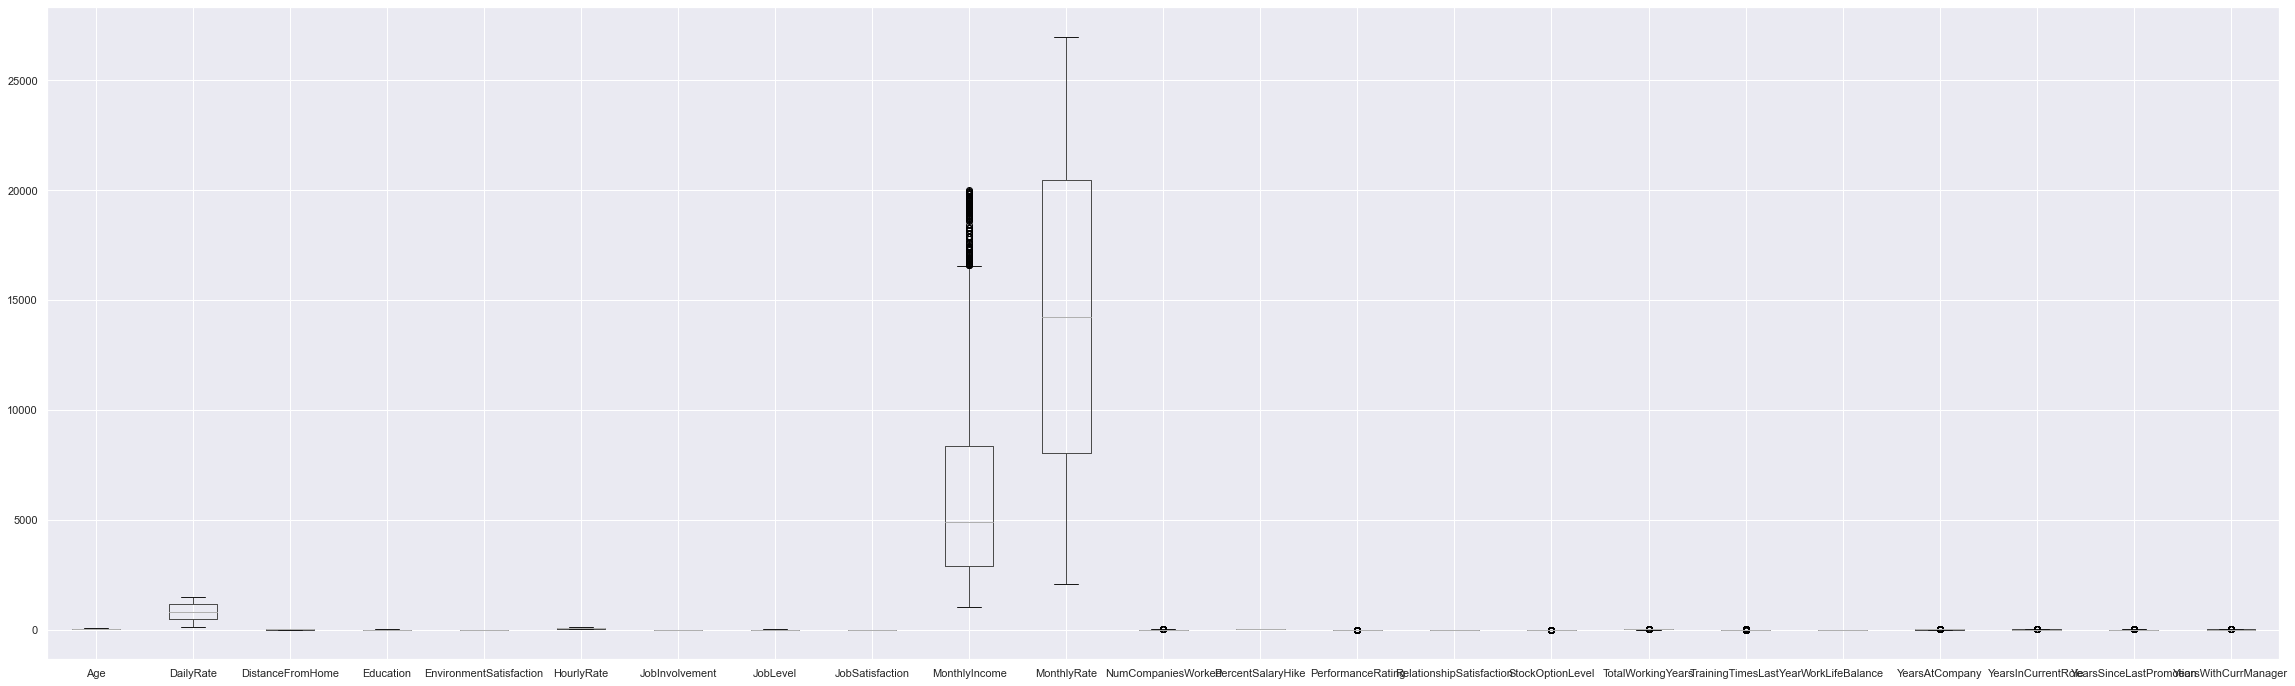

In [72]:
plt.figure(figsize=(40,12))
df.boxplot();

In [73]:
df = df.drop(columns=['MonthlyIncome' , 'TotalWorkingYears' , 'JobLevel', 'YearsInCurrentRole' , 'YearsWithCurrManager' , 'YearsSinceLastPromotion' , 'YearsAtCompany' , 'PercentSalaryHike'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [74]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
features_to_encode = ['Attrition' ,'BusinessTravel' , 'Department' , 'Gender' , 'JobRole' , 'MaritalStatus' , 'OverTime']
for feature in features_to_encode:
    df[feature] = lb.fit_transform(df[feature])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int32 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobRole                   1470 non-null   int32 
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [76]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,1,2,1102,2,1,2,Life Sciences,2,0,...,4,2,19479,8,1,3,1,0,0,1
1,49,0,1,279,1,8,1,Life Sciences,3,1,...,2,1,24907,1,0,4,4,1,3,3
2,37,1,2,1373,1,2,2,Other,4,1,...,3,2,2396,6,1,3,2,0,3,3
3,33,0,1,1392,1,3,4,Life Sciences,4,0,...,3,1,23159,1,1,3,3,0,3,3
4,27,0,2,591,1,2,1,Medical,1,1,...,2,1,16632,9,0,3,4,1,3,3


In [77]:
x = df
x = x.drop(columns=['Attrition'])
y = df['Attrition']

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35, random_state=0)

In [80]:
y_train.value_counts()

0    801
1    154
Name: Attrition, dtype: int64

In [81]:
x_train.shape

(955, 22)

In [82]:
x_test.shape

(515, 22)

In [83]:
y_test.shape

(515,)

In [84]:
y_train.shape

(955,)

In [85]:
x=df.drop(columns=['BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobRole',  'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance'])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int32
 2   EnvironmentSatisfaction  1470 non-null   int64
 3   JobInvolvement           1470 non-null   int64
 4   MaritalStatus            1470 non-null   int32
 5   OverTime                 1470 non-null   int32
dtypes: int32(3), int64(3)
memory usage: 51.8 KB


In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, solver='newton-cg', random_state=1)


In [87]:
x_train_nf, x_test_nf, y_train_nf, y_test_nf = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [88]:
model.fit(x_train_nf, y_train_nf)
y_pred = model.predict(x_test_nf)

#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test_nf,y_pred)

array([[432,   0],
       [  0,  83]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00        83

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



In [91]:
print('Thus, now we have the  accuracy of predicting attrition is about 1%.')

Thus, now we have the  accuracy of predicting attrition is about 1%.


# 

# THANK YOU